<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/HW2_Fall2021_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #2 - Solution - Fall 2021

## Problem #1 - Haystacks

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#@title Reading Data

# Reading data in using read_csv
Haystacks <- read_csv("http://www.StatsClass.org/stat360/Datasets/Haystacks.csv")

Rows: 120 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): RowID, Volume, Circumference, Over


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
#@title View the first few rows of data
head(Haystacks)

RowID,Volume,Circumference,Over
<dbl>,<dbl>,<dbl>,<dbl>
1,2853,69.0,37.0
2,2702,65.0,36.5
3,3099,73.0,38.5
4,1306,62.5,26.5
5,2294,70.0,35.0
6,2725,68.0,36.5


### Marginal Distribution

In [9]:
#@title Question 1: Marginal Distribution
( Haystacks
     %>% summarize(
                    Avg = mean(Volume),
                    'Standard Deviation' = sd(Volume),
                    'Variance' = var(Volume),
                    Count = n()
                 )
     %>% mutate('Total Unexplained' = (Count - 1) * Variance)
)

Avg,Standard Deviation,Variance,Count,Total Unexplained
<dbl>,<dbl>,<dbl>,<int>,<dbl>
3017.789,914.698,836672.5,120,99564027


### Distribution of Volume | Circumference

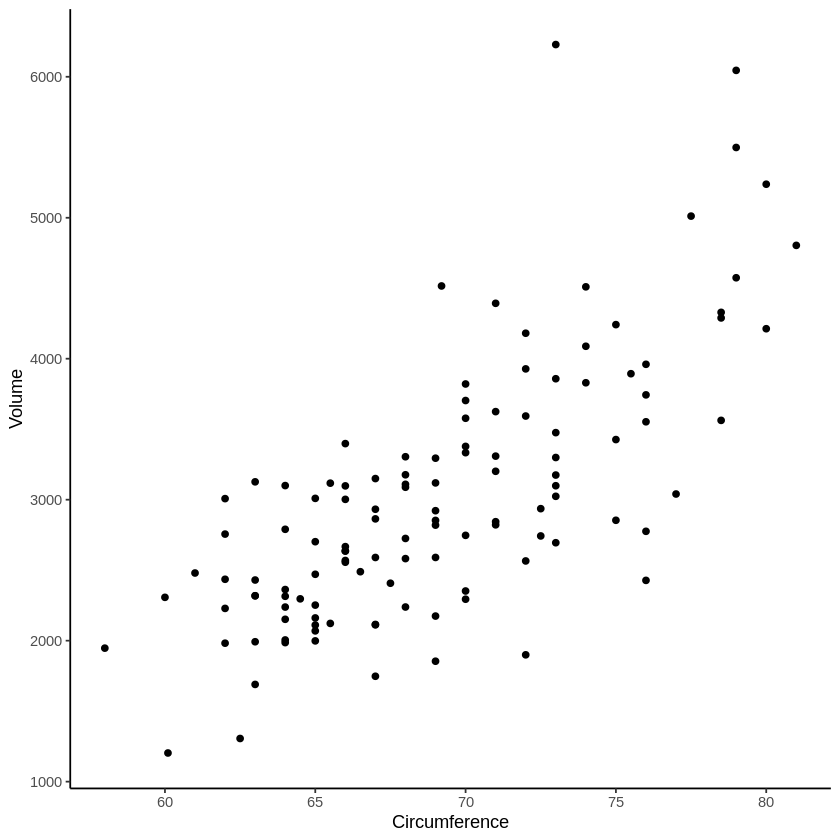

In [11]:
#@title Question 2: Plot of Volume vs Circumference
ggplot(data=Haystacks, aes(x=Circumference, y=Volume)) + 
  geom_point() +
  theme_classic()

In [21]:
#@title Question 4: Getting the predicted volume and plotting the function on the scatterplot
Haystacks <- (Haystacks
               %>% mutate(Predicted_Volume_withCircumference = (Circumference^3) / (12 * 3.1416^2))
             )

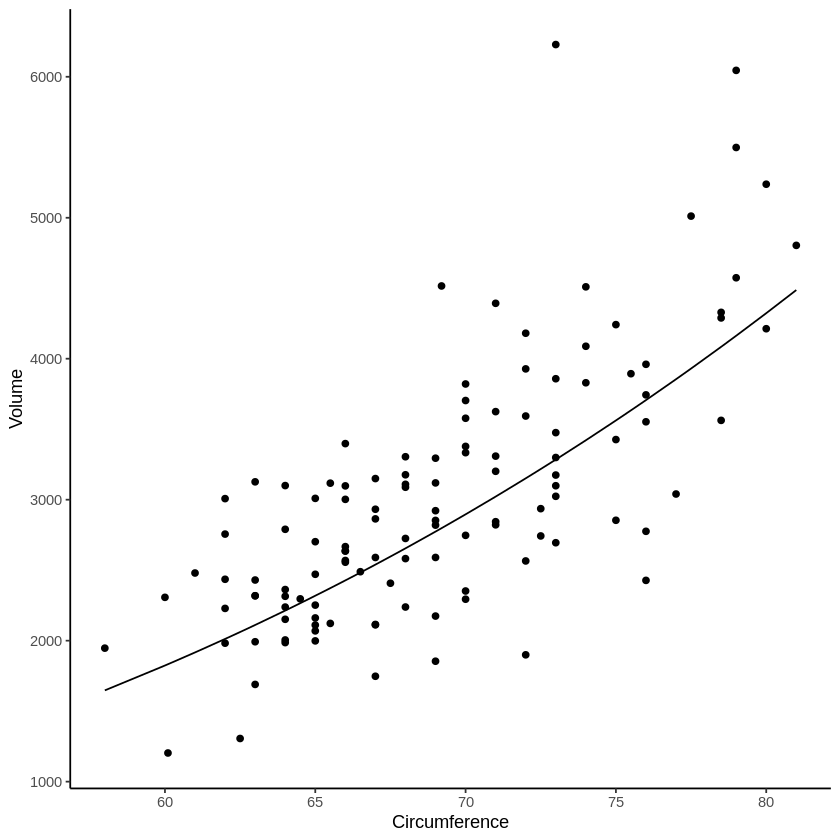

In [22]:
ggplot(data=Haystacks, aes(x=Circumference, y=Volume)) + 
  geom_point() +
  geom_line(aes(x=Circumference, y=Predicted_Volume_withCircumference)) +
  theme_classic()

In [30]:
#@title Question 5: Total Unexplained Variation in Conditional Distribution
Haystacks <- (Haystacks
               %>% mutate(Residual_withCircumference = (Volume - Predicted_Volume_withCircumference),
                          Residual_withCircumferenceSquared = Residual_withCircumference^2
                         )
             )

(Haystacks
     %>% summarize( 
                    'Total Unexplained Conditional' = sum(Residual_withCircumferenceSquared)
                  )
)     

Total Unexplained Conditional
<dbl>
50151624


### Distribution of Volume | Over

In [27]:
Haystacks <- (Haystacks
    %>% mutate(Predicted_Volume_withOver = ( 2*(Over^3) )/ (3 * 3.1416^2))
)

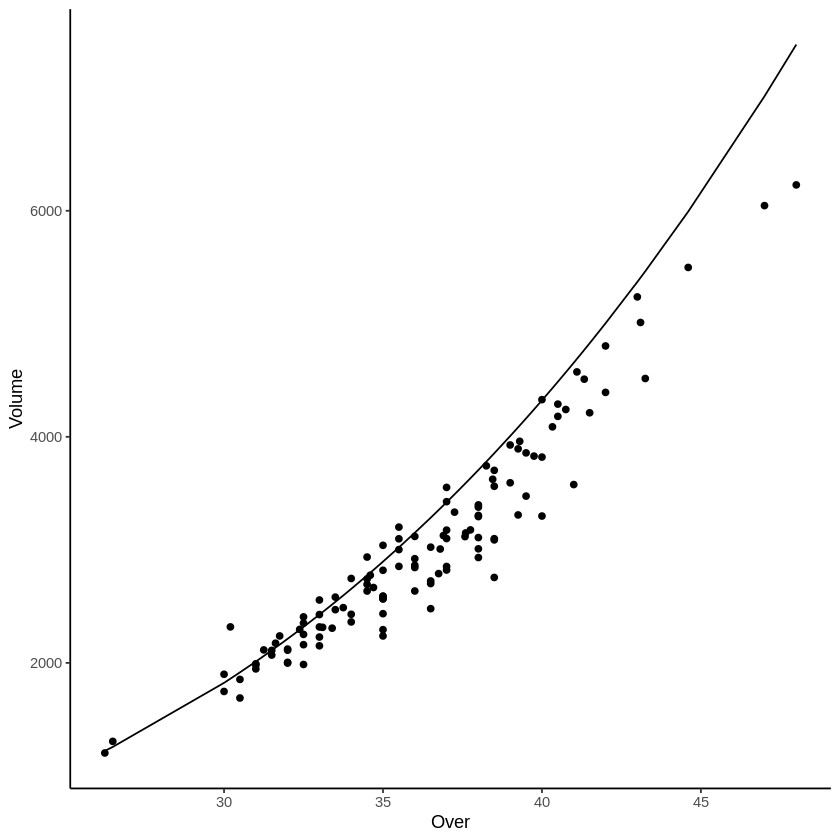

In [29]:
#@title Question 7: Plot of Volume vs Over
ggplot(data=Haystacks, aes(x=Over, y=Volume)) + 
  geom_point() +
  geom_line(aes(x=Over, y=Predicted_Volume_withOver)) +
  theme_classic()

In [32]:
#@title Question 8: Total Unexplained Variation in Conditional Distribution
Haystacks <- (Haystacks
               %>% mutate(Residual_withOver = (Volume - Predicted_Volume_withOver),
                          Residual_withOverSquared = Residual_withOver^2
                         )
             )

(Haystacks
     %>% summarize( 
                    'Total Unexplained Conditional' = sum(Residual_withOverSquared)
                  )
)   

Total Unexplained Conditional
<dbl>
19953979


## Berkeley Guidance Study of Growth Rate

In [33]:
# Reading data in using read_csv
BGSGirls <- read_csv("http://www.StatsClass.org/stat360/Datasets/BGSGirls.csv")

Rows: 70 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): TableID, SomatoType, Weight2, Height2, Weight9, Height9, Leg9, Str...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Taking a look at the data.frame

In [34]:
head(BGSGirls)

TableID,SomatoType,Weight2,Height2,Weight9,Height9,Leg9,Strength9,Weight18,Height18,Leg18,Strength18
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.0,13.6,87.7,32.5,133.4,28.4,74,56.9,158.9,34.6,143
2,4.0,11.3,90.0,27.8,134.8,26.9,65,49.9,166.0,33.8,117
3,5.5,17.0,89.6,44.4,141.5,31.9,104,55.3,162.2,35.1,143
4,5.5,13.2,90.3,40.5,137.1,31.8,79,65.9,167.8,39.3,148
5,4.5,13.3,89.4,29.9,136.1,27.7,83,62.3,170.9,36.3,152
6,3.0,11.3,85.5,22.8,130.6,23.4,60,47.4,164.9,31.8,126


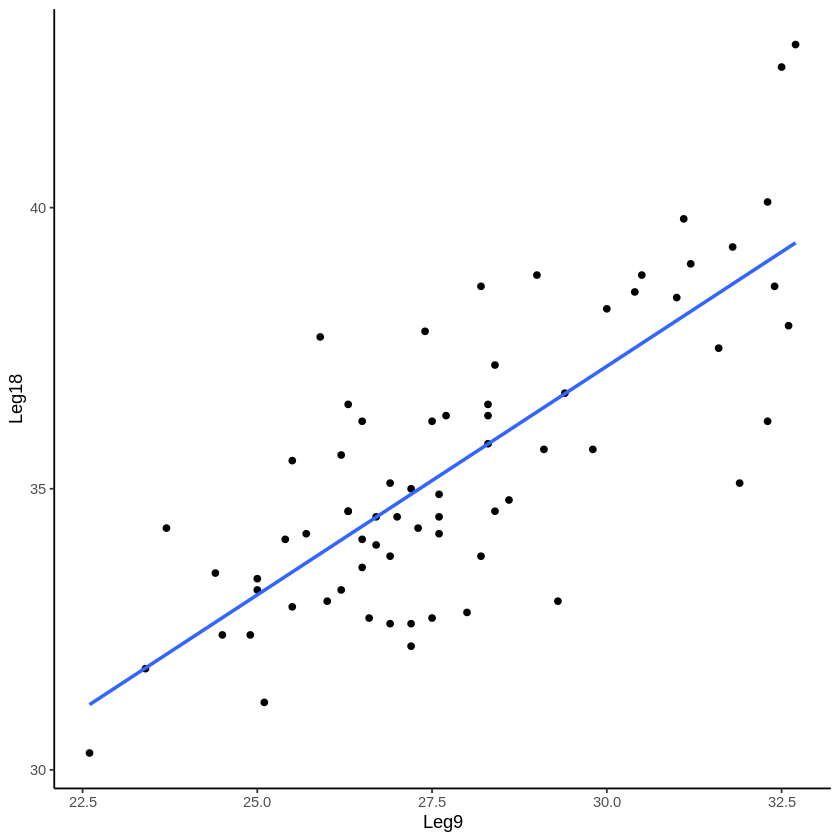

In [38]:
ggplot(data = BGSGirls, aes(x=Leg9, y=Leg18)) +
  geom_point() +
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  
  theme_classic()


Fitting the desired model for $Leg18 \sim Leg9$

In [39]:
Leg_Model <- lm(Leg18 ~ Leg9, data=BGSGirls)

In [41]:
#@title Question 12: Overall ANOVA test
anova(Leg_Model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Leg9,1,273.9430,273.942952,99.8383,5.64627e-15
Residuals,68,186.5829,2.743866,NA,NA


In [42]:
#@title Question 13/14: Model Estimates
summary(Leg_Model)


Call:
lm(formula = Leg18 ~ Leg9, data = BGSGirls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6236 -0.9164  0.0044  0.9951  3.8555 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.78279    2.27405   5.621 3.85e-07 ***
Leg9         0.81319    0.08139   9.992 5.65e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.656 on 68 degrees of freedom
Multiple R-squared:  0.5948,	Adjusted R-squared:  0.5889 
F-statistic: 99.84 on 1 and 68 DF,  p-value: 5.646e-15




---


End of Document